

# AMLS Assignment Draft
## Task B: CNN on BloodMNIST Dataset

Explore CNN based classifiers on the BloodMNIST dataset.

## Import libraries
The required libraries for this notebook are sklearn, copy, numpy and matplotlib.

In [1]:
## first enable autoreload during development so latest (new) version local code library is reloaded on execution 
## can be commented out when local code development not happening to avoid overhead
%load_ext autoreload
%autoreload 2

## import libraries
import io
import numpy as np
import matplotlib.pyplot as plt

## tqdm callback moved to AMLS_common
        
## import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, Hinge

## local code library
import AMLS_common as ac

## Set base parameters
Including hyperparameters and environment specifics

In [2]:
## Initialize hyperparameters
parameter = ac.HyperParameters(learning_rate=0.001, 
                               batch_size=128, 
                               num_epochs=30, 
                               num_filter=64,
                               layers=5,
                               dropout_rate=0.1,
                               optimise="Adam",
                               strides=2,
                               padding="same",
                               loss="sparse_categorical_crossentropy")

tqdm_callback = ac.TqdmEpochProgress(total_epochs=parameter.num_epochs)

In [3]:
## control (e.g. verbose) parameters
filebase   = "metrics/"          ## place to save output files
verbose    = 1                   ## to control whether additional in process information is printed

## Load and preprocess the BloodMNIST Data
We load the dataset.

In [4]:
## Loading the data file using common MedMINST loader
data_flag  = 'bloodmnist'        # defines which dataset to load
result_set = ac.medMNIST_load(data_flag,parameter.batch_size)

## check that the loader returned data correctly and then split out
if result_set != []:
    train_dataset = result_set[0]
    test_dataset  = result_set[1]
    val_dataset   = result_set[2]

if verbose == 1:
    ## print summary stats for training dataset
    print("\nSummary metrics for train_dataset")
    print("type:",type(train_dataset))
    print("length:",len(train_dataset))
    print("shape:",train_dataset)

Using downloaded and verified file: C:\Users\johnc\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\bloodmnist.npz

Summary metrics for train_dataset
type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
length: 94
shape: <BatchDataset shapes: ((None, 28, 28, 3), (None, 1)), types: (tf.float64, tf.float32)>


## Define the CNN model

Define a base model

In [5]:
## Define the model
if verbose == 1:
    print("Default activation is ",parameter.default_activation)

if parameter.layers == 3:
    model = Sequential([
            Conv2D(parameter.num_filter*4, (3, 3), activation=parameter.default_activation, \
                   input_shape=(28, 28, 3)),                                                        ## Input layer
            Conv2D(parameter.num_filter, (3, 3), activation=parameter.default_activation),          ## Convolution layer 
            MaxPooling2D((2, 2)),                                                                   ## Reduce the features
            Conv2D(parameter.num_filter, (3, 3), activation=parameter.default_activation),          ## Another Convolution layer 
            MaxPooling2D((2, 2)),                                                                   ## Again reduce the features
            Flatten(),                                                                              # Flatten
            Dropout(parameter.dropout_rate),                                                        # added dropout
            Dense(8, activation='softmax')                                                          # Output layer for 8 types
    ])
    
if parameter.layers == 4:
        model = Sequential([
            Conv2D(parameter.num_filter*4, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation,input_shape=(28, 28, 3)),                ## Input layer
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Convolution layer 
            MaxPooling2D((2, 2),strides=parameter.strides),                                         ## Reduce the features
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Another Convolution layer 
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Added Convolution layer 
            MaxPooling2D((2, 2),strides=parameter.strides),                                         ## Again reduce the features
            Flatten(),                                                                              ## Flatten
            Dropout(parameter.dropout_rate),                                                        ## added dropout
            Dense(8, activation='softmax')                                                          ## Output layer for 8 types 
        ])

if parameter.layers == 5:
        model = Sequential([
            Conv2D(parameter.num_filter*4, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation,input_shape=(28, 28, 3)),                ## Input layer
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Convolution layer 
            MaxPooling2D((2, 2),strides=parameter.strides),                                         ## Reduce the features
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Another Convolution layer 
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Added Convolution layer 
            MaxPooling2D((2, 2),strides=parameter.strides),                                         ## Again reduce the features
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Another Convolution layer 
            Conv2D(parameter.num_filter, (3, 3), padding=parameter.padding,\
                   activation=parameter.default_activation),                                        ## Added Convolution layer 
            MaxPooling2D((2, 2),strides=parameter.strides),                                         ## Again reduce the features
            Flatten(),                                                                              ## Flatten
            Dropout(parameter.dropout_rate),                                                        ## added dropout
            Dense(8, activation='softmax')                                                          ## Output layer for 8 types 
        ])
        
print(model.summary())
## Redirect the summary output to a string
summary_string = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + "\n"))
summary_content = summary_string.getvalue()
summary_string.close()

optimizer_choice = str(parameter.optimise)+'(learning_rate='+str(parameter.learning_rate)+')'
optimizer        = eval(optimizer_choice)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),                                                   
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc')

Default activation is  relu
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        147520    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)           

## Fit the model

Fit using hyperparameters as defined above

Epoch Progress: 100%|██████████| 30/30 [3:14:32<00:00, 389.07s/epoch, loss=0.0803, acc=0.971, val_loss=0.31, val_acc=0.911]   


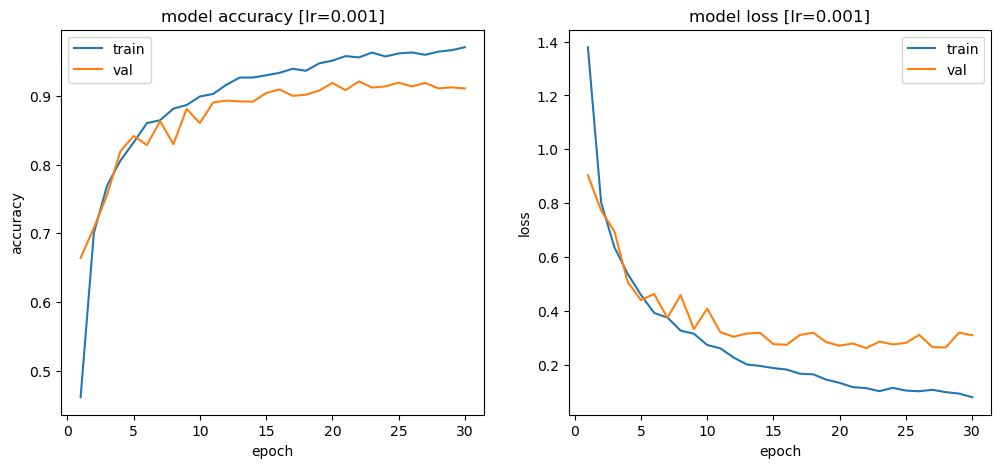

for model
 Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        147520    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)

['metrics/metrics_2024_12_27_at_185410.xlsx',
 'metrics/summary_2024_12_27_at_185410.txt',
 RunResult(min_loss=0.08026079833507538, max_acc=0.9710677862167358, last_loss=0.08026079833507538, last_acc=0.9710677862167358, var_loss=0.07393779630001819, var_acc=0.010898843461932725),
 HyperParameters(learning_rate=0.001, batch_size=128, num_epochs=30, optimise='Adam', loss='sparse_categorical_crossentropy', num_filter=64, strides=2, padding='same', dropout_rate=0.1, layers=5, default_activation='relu')]

In [6]:
## Fit the model

history = model.fit(train_dataset, 
                    validation_data=test_dataset, 
                    epochs=parameter.num_epochs, 
                    batch_size=parameter.batch_size, 
                    verbose=0,
                    callbacks = [tqdm_callback])

## output graphs and save metrics files
ac.graph_and_save(history,summary_content,parameter,filebase)

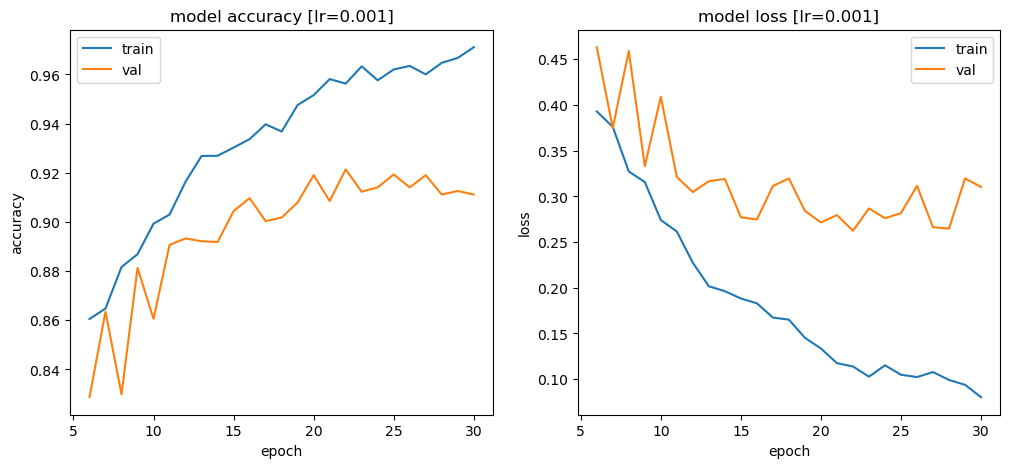

for model
 Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        147520    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)

In [7]:
ac.graph(history,summary_content,parameter,skip=5)